# Assignment 2: Boston Housing Dataset Regression Task

### Step 1: Importing Libraries and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fetch the Boston dataset from its original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Process the dataset
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
    "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=columns)
df["MEDV"] = target

# Display the first few rows
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### Step 2: Data Preprocessing and Visualization

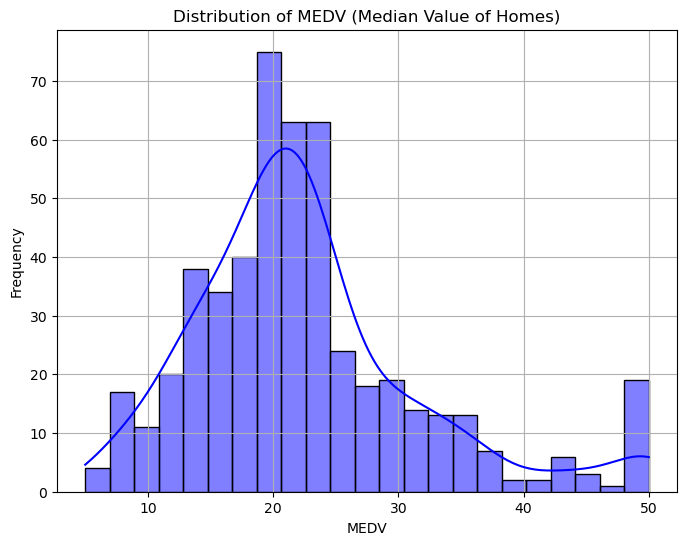

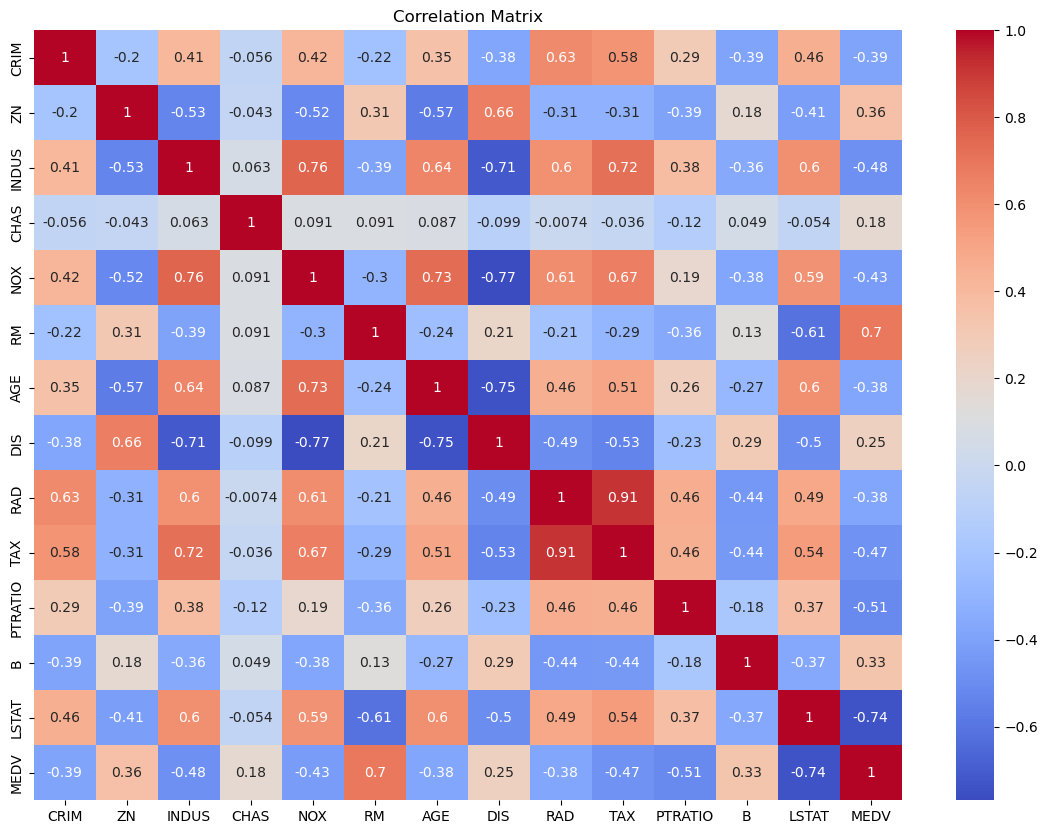

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is already loaded as a NumPy array and 'columns' contains the column names
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
    "TAX", "PTRATIO", "B", "LSTAT"
]
# Convert 'data' to a DataFrame and include the target variable 'MEDV'
df = pd.DataFrame(data, columns=columns)
df["MEDV"] = target

# Handle missing values (if any)
if df.isnull().sum().any():
    df.fillna(df.mean(), inplace=True)

# Visualize target variable distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], kde=True, color='blue')
plt.title("Distribution of MEDV (Median Value of Homes)")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Explore relationships between predictors and target variable
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Step 3: Splitting the Dataset into Training and Test Sets

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert 'data' to a DataFrame if it's a NumPy array
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
    "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=columns)
df["MEDV"] = target

# Split data into train (70%) and test (30%) sets
X = df.drop('MEDV', axis=1)  # Independent variables
y = df['MEDV']               # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (354, 13)
X_test shape: (152, 13)
y_train shape: (354,)
y_test shape: (152,)


### Step 4: Training the Regression Model

In [4]:

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


### Step 5: Evaluating the Model

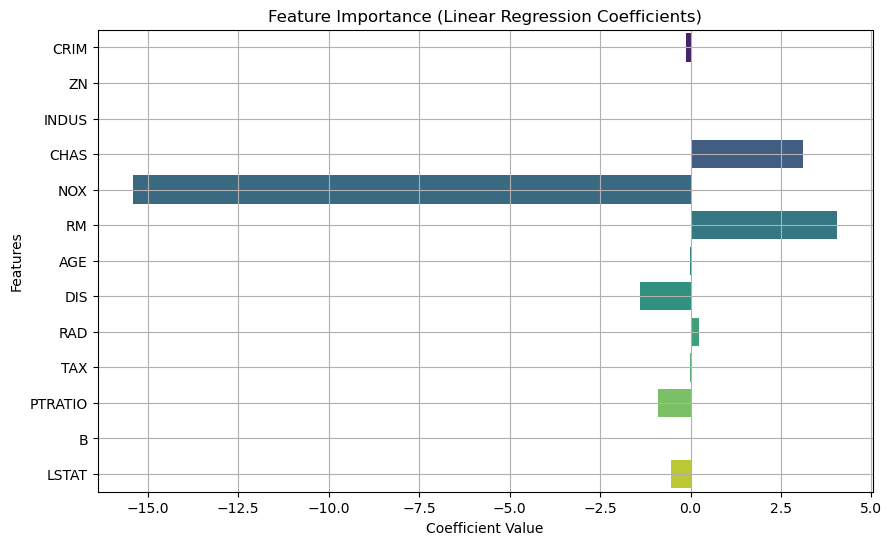

In [5]:

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

# Feature importance (coefficients in Linear Regression)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(True)
plt.show()


### Step 6: Improving the Model with Polynomial Features

In [6]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate the improved model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
adjusted_r2_poly = 1 - (1 - r2_poly) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

# Compile results
results = {
    "Metric": ["MAE", "MSE", "RMSE", "R2", "Adjusted R2"],
    "Initial Model": [mae, mse, rmse, r2, adjusted_r2],
    "Improved Model": [mae_poly, mse_poly, rmse_poly, r2_poly, adjusted_r2_poly],
}
results_df = pd.DataFrame(results)
results_df


,Metric,Initial Model,Improved Model
0,MAE,3.162710,5.509050
1,MSE,21.517444,68.231265
2,RMSE,4.638690,8.260222
3,R2,0.711226,0.084305
4,Adjusted R2,0.703596,0.060110
